# Proyecto ISIS-3302 (Modelado, Optimización y Simulación)

- Paulina Arrazola Vernaza - 202020631
- Santiago Alejandro Jaimes Puerto - 201912921
- Nicolás Rincón Sánchez - 202021963

# Etapa I (Planteamiento)

## 1. Lectura y Comprensión del Enunciado

El Proyecto A plantea un problema de logística urbana en la ciudad de Bogotá enfocado en la distribución eficiente de mercancías. La empresa LogistiCo, a través de su división Urban Logistics, opera múltiples centros de distribución en la ciudad y sus alrededores para hacer frente al crecimiento de las entregas de comercio electrónico​. El objetivo fundamental es minimizar los costos operativos de transporte (combustible, mantenimiento, etc.) garantizando entregas rápidas y seguras a todos los clientes, y cumpliendo con las restricciones físicas y organizacionales del negocio. En Bogotá, esto implica enfrentar desafíos importantes como la elevada congestión vehicular en varios puntos de la ciudad, restricciones de acceso debido a obras y exigentes tiempos de servicio.

Para comprender el enunciado, se identifican los elementos del sistema de envíos de LogistiCo en Bogotá y se abstrae la situación a un problema de optimización combinatoria. 

Lo que se quiere hacer es planificar qué centro de distribución atiende a cada pedido y con qué vehículo y trazar las rutas óptimas de los vehículos para cumplir con todas las entregas sobre el mapa de la ciudad. Este problema corresponde a un problema de enrutamiento de vehículos en logística (un VRP por sus siglas en inglés, Vehicle Routing Problem).

Ahora bien, cada ruta de vehículo se asemeja a un problema de agente viajero (TSP, Travelling Salesman Problem) extendido semejante al Problema 5 del Laboratorio 2, en el que se cuenta con varios agentes. En este caso, varios vehículos que deben seguir rutas a través de varios depósitos y varios puntos de entrega según su demanda respectiva. Por lo tanto, el problema puede interpretarse como un VRP con multiples depósitos y con capacidades, donde se debe decidir la asignación de clientes a centros de distribución y la ruta de visitas de cada vehículo, minimizando el costo total.

## 2. Identificación de Elementos Clave

A partir del enunciado, se distinguen los componentes esenciales del sistema logístico y las limitaciones que lo rigen:

- Centros de Distribución (CD): Instalaciones desde donde parten los vehículos con los pedidos. En el ejemplo del enunciado se cuentan con tres centros (CD1, CD2, CD3) con ubicaciones geográficas dadas y una capacidad máxima de almacenamiento en cada uno. La capacidad de cada centro (por ejemplo, 20,000 kg en CD1) es una restricción física que limita la cantidad de inventario que se puede gestionar desde allí. Esto significa que la asignación de inventario a cada bodega debe respetar su límite para no exceder el espacio disponible.

- Clientes o Zonas de Entrega (C): Son los destinos finales de los pedidos. Cada cliente tiene una ubicación geográfica (latitud, longitud) y una demanda asociada (cantidad de unidades a entregar). Todos los clientes deben ser atendidos, es decir, cada demanda debe ser satisfecha por completo por al menos un vehículo. Una limitación organizacional importante es el nivel de servicio ya que se espera cumplir todas las entregas en tiempo y forma, lo que implica que no se pueden dejar demandas sin atender o se debe penalizar esto fuertemente

- Vehículos (V): La flota vehicular asignada a las entregas urbanas. En el ejemplo hay tres vehículos disponibles (V1, V2, V3), cada uno con capacidad máxima de carga y autonomía de recorrido en kilómetros. Estas cifras imponen restricciones en el modelo ya que un vehículo no puede transportar más mercancía de la que permite su capacidad y no puede recorrer más distancia de la que le otorga su autonomía de combustible. La gestión de vehículos deberá entonces respetar que la suma de demandas atendidas por un vehículo no exceda su capacidad, y que la distancia total recorrida en su ruta no exceda su rango útil.

- Red de rutas (vías urbanas): Conecta geográficamente los centros de distribución con los clientes. A diferencia de un plano euclideano simple, la red vial impone distancias reales y tiempos de viaje que pueden ser mayores que la distancia en línea recta entre dos puntos debido a la estructura de las calles. Un elemento clave es la planificación de rutas: los vehículos pueden visitar múltiples clientes en un mismo recorrido, realizando una ruta que conecta un centro con varios clientes de forma secuencial. De esta manera se debe contemplar para atacar esta parte del problema cuál secuencia de visitas realiza cada vehículo para optimizar el recorrido general. El segundo elemento clave es la posibilidad de conexiones directas entre clientes en una misma ruta se reconoce como una oportunidad para mejorar la eficiencia, en lugar de regresar al centro de distribución tras cada entrega individual. Sin embargo, también se debe asegurar que no queden “subrutas” aisladas (subtours) que no conecten con un centro, respetando la conectividad de cada ruta.

- Costos operativos: Si bien no son un componente tangible, los costos (combustible, mantenimiento, personal, etc.) son un elemento clave a optimizar. El enunciado menciona tarifas de flete por kilómetro, costos de combustible por litro y costos de mantenimiento por kilómetro, entre otros. Estos parámetros económicos se deben identificar y cuantificar adecuadamente para incorporarlos en el modelo. Limitaciones organizacionales como el presupuesto disponible o los niveles de servicio mínimos podrían también considerarse, pero consideramos que estos costos se pueden integrar satisfactoriamente en la función objetivo.

Además de estos componentes, se identifican las limitaciones del negocio: 
- La integridad del inventario (no sobrepasar capacidades de bodega) 
- Las restricciones físicas de los vehículos (capacidad y autonomía)
- La necesidad de cumplir todas las entregas (restricción de cobertura de demanda)
- Las condiciones urbanas (congestión, posibles ventanas de tiempo de entrega, entre otros). 

En resumen, el sistema se compone de múltiples depósitos con inventario limitado, una flota de vehículos limitada en carga y distancia, y un conjunto de clientes con demandas, todo ello conectado por posibles rutas en la red urbana. Estas características y restricciones se deben conteplar a la hora de formular nuestro modelo de optimización.


## 3. Formulación de la Estructura del Modelo:

### 3.1 Conjuntos

- I: Conjunto de centros de distribución = {1, 2, ..., m}

- J: Conjunto de clientes (o puntos de entrega) = {1, 2, ..., n}

- V: Conjunto de vehículos disponibles = {1, 2, ..., k}

Para modelar las rutas, conviene definir el conjunto de *nodos* $N$ que un vehículo puede visitar. Este estará compuesto por los centros y los clientes: $N = I \cup J$. En esencia, $N$ representa todos los puntos entre los cuales pueden viajar los vehículos. Cada ruta de un vehículo $k$ partirá de un nodo de $I$ (un centro de distribución) y visitará uno o varios nodos de $J$ (clientes) antes de retornar al centro de partida.

### 3.2 Parámetros

- $A_i$: Capacidad de almacenamiento del centro de distribución $i \in I$ (en unidades de producto). Por ejemplo, $A_{\text{CD1}} = 20000$ kg. Por defecto, asumiremos que las unidades de producto siempre estarán en kilogramos

- $D_j$: Demanda del cliente $j \in J$ (unidades de producto a entregar). 

- $Q_k$: Capacidad de carga del vehículo $k \in K$ (unidades de producto puede llevar). 
- $R_k$: Autonomía (rango máximo) del vehículo $k \in K$ en kilómetros. Por ejemplo, $R_{\text{V2}}=100$ km. Es decir, cuántos kilómetros puede andar sin necesitar de una recarga de combustible.

- $c_{uv}$: Costo unitario de recorrer el arco desde nodo $u$ hasta nodo $v$ (COP). Este costo puede descomponerse o calcularse a partir de varios factores como el costo de combustible por km, costo de mantenimiento por km, costo variable por uso del vehículo, etc. 

En este proyecto se propone calcular $c_{uv}$ principalmente como un costo proporcional a la distancia por carretera (km) entre $u$ y $v$, dado que los costos por km (combustible, mantenimiento, tarifa de flete) son conocidos. Por ejemplo, si se estima un costo total de \$20.700 COP por km (suma de \$15.000 de combustible, \$5.000 de flete y \$700 de mantenimiento), y la distancia en ruta entre dos puntos es 10 km, entonces $c_{uv} \approx 20700 \times 10 = 207000$ COP. (Para simplificar nuestro modelo, supondremos que el costo es una función lineal con la distancia.)

$$c_{uv} = d_{uv}\cdot(C_{combustible} + C_{mantenimiento} + C_{flete})$$

- $d_{uv}$: Distancia en km por la ruta óptima de la red vial desde el nodo $u \in N$ hasta el nodo $v \in N$. Este parámetro se obtiene en la etapa de preprocesamiento de datos usando herramientas GIS (herramientas que permiten recopilar, gestionar, analizar y visualizar datos geográfico)

- $t_{uv}$ representa el tiempo requerido para transitar desde el nodo $u$ hasta el nodo $v$. Se calcula considerando la distancia entre $u$ y $v$, la velocidad promedio del vehículo, condiciones de tráfico y otros factores que afectan la duración del trayecto. Para esto, podemos aprovechar el API de Google Maps que nos suministra una pareja de distancia y tiempo estimado para cualquier ruta.

### 3.3 Variables de Decisión

- $x_{uvk} \in \{0,1\}$: Variable binaria que vale 1 si el vehículo $k \in K$ viaja directamente desde el nodo $u \in N$ hasta el nodo $v \in N$ en su ruta, y 0 en caso contrario. Estas variables nos permiten definir la ruta recorrida por cada vehículo, indicando los arcos del grafo de nodos se utilizan. 

- $y_{ik} \in \{0,1\}$: Variable binaria que vale 1 si el vehículo $k \in K$ inicia su ruta desde el centro de distribución i. Esta variable nos puede ser útil cuando hay múltiples depósitos para indicar qué centro (depósito) “usa” cada vehículo.

- $u_{j,k} \ge 0$: Variables continuas auxiliares para cada cliente j y vehículo $k \in K$, utilizadas para eliminar subtours. Estas variables suelen representar el orden de visita de los clientes en la ruta de un vehículo (p. ej., $u_{j,k}$ puede indicar la posición del cliente $j$ en la ruta del vehículo $k$).


### 3.4 Función Objetivo

Inicialmente, planteamos una Función Objetivo (FO) que busca minimizar el costo total de operación. Matemáticamente, se puede expresar así:

$$
\min \; Z \;=\; \sum_{k \in K} \sum_{u \in N} \sum_{v \in N} c_{uv}\; x_{uvk}
$$

donde $c_{uv}$ incorpora los costos por kilómetro por la distancia de la ruta en kilómetros (es decir, es el costo total de la ruta en cuestión expresado en COP) y $x_{uvk}$ indica si esa ruta se recorre o no por el vehículo $k$. De este modo, $Z$ suma el costo de todos los trayectos realizados por la flota, lo que equivale a minimizar la distancia total recorrida, dado que el costo por kilómetro previamente calculado lo vamos a tomar constante en $207.000 (por el análisis realizado previamente en el punto 3.2)

### 3.5 Restricciones


1. Cobertura de clientes: cada cliente $j$ debe ser visitado exactamente una vez por exactamente un vehículo. Esto se asegura con la restricción:

   $$
   \sum_{k \in K} \sum_{u \in N} x_{u,j,k} = 1, \qquad \forall j \in J\,,
   $$

   que indica que la suma de arcos que entran al cliente $j$ (provenientes de algún nodo $u$, sea un centro u otro cliente, por algún vehículo $k$) debe ser 1. Equivalentemente, cada cliente tiene un único predecesor en alguna ruta de algún vehículo. Esta condición garantiza que todos los pedidos son atendidos y que no haya duplicación (un mismo cliente no es visitado dos veces ni es visitado por dos vehículos distintos).




2. Conservación de flujo (continuidad de ruta): para cada cliente que es atendido por un vehículo, la llegada y salida de ese cliente en la ruta deben estar conectadas. Es decir, si un vehículo $k$ entra al nodo $j$, también debe salir de $j$ (a menos que $j$ sea la última visita y se retorne al depósito). Matemáticamente, para cada cliente $j$ y cada vehículo $k$:

   $$
   \sum_{u \in N} x_{u,j,k} = \sum_{v \in N} x_{j,v,k}, \qquad \forall j \in J,\; \forall k \in K\,.
   $$

   Esta ecuación balancea el arco de entrada y el arco de salida del cliente $j$ en la ruta del vehículo $k$. Garantiza que la ruta de $k$ que pasa por $j$ no se interrumpe allí sino que continúa a un sucesor. En el caso de los centros de distribución, la condición se debe plantear de una manera distinta: cada vehículo que parte de un centro $i$ debe también regresar a un centro al final, que posiblemente puede ser el mismo, pero no necesariamente lo es. Por facilidad del modelado, asumiendo que cada vehículo debe retornar a su centro de origen, entonces para cada vehículo $k$ asignado al centro $i$ se tiene como restricción de salida del centro:

   $$
   \sum_{v \in N} x_{i,v,k} = y_{ik}, \quad \forall i \in I, \forall k \in K,
   $$

   y de forma análoga para el regreso al centro:

   $$
   \sum_{u \in N} x_{u,i,k} = y_{ik}, \quad \forall i \in I, \forall k \in K.
   $$

   lo cual indica que si el vehículo $k$ sale una vez del depósito $i$ (iniciando su ruta), regresa una vez a ese mismo depósito al finalizar (ciclo cerrado y condicionante al hecho que el vehículo arranque desde el depósito o centro de distribución $i$). Esta es la formalización de que cada vehículo realiza una única ruta que inicia y termina en su centro asignado.




3. Capacidad de vehículos: la suma de las demandas atendidas por un vehículo $k$ en su recorrido no debe exceder su capacidad $Q_k$. Para implementar esta restricción, se pueden usar las variables $x$ sumadas sobre los clientes: 

   $$
   \sum_{j \in J} \sum_{u \in N} D_j \cdot x_{u,j,k} \le Q_k, \qquad \forall k \in K\,.
   $$

   Aquí, $\sum_{u}x_{u,j,k}$ será 1 si el vehículo $k$ visitó al cliente $j$, y 0 si no lo visitó. Por tanto, $\sum_{j} d_j \sum_{u}x_{u,j,k}$ acumula todas las demandas entregadas por $k$. Esta cantidad debe ser menor o igual a la capacidad del vehículo. Esta restricción asegura que un camión no pueda llevar más pedidos/contenido de lo que le cabe.




4. Autonomía (rango) de vehículos: la distancia total recorrida por cada vehículo $k$ no debe superar $R_k$. Si $d_{uv}$ es la distancia de $u$ a $v$, podemos escribir:

   $$
   \sum_{u \in N}\sum_{v \in N} d_{uv} \cdot x_{u,v,k} \le R_k, \qquad \forall k \in K\,.
   $$

   Esta restricción garantiza que ningún vehículo intente realizar un recorrido más largo de lo que permite su combustible.




5. Capacidad de centros de distribución: la suma de las demandas que salen de cada centro $i$ (es decir, los pedidos atendidos por vehículos de $i$) no debe exceder el inventario disponible en $i$:

   $$
   \sum_{k \in K} \sum_{j \in J} \sum_{u \in N} y_{ik} \cdot D_j \cdot x_{u,j,k} \le A_i, \qquad \forall i \in I\,.
   $$

   De esta manera, al multiplicar la suma de demandas de los clientes atendidos por el vehículo $k$ por $y_{ik}$, nos aseguramos de que dicha demanda solo se cuente cuando el vehículo inicia su ruta en el centro $i$ (es decir, cuando $y_{ik}=1$). De este modo, nos damos cuenta de que la restricción conecta adecuadamente las decisiones de asignación de clientes a centros con la limitación de capacidad disponible en cada uno de ellos.



6. Eliminación de subrutas: en problemas de enrutamiento, es necesario prevenir soluciones donde un vehículo forme ciclos cerrados que no incluyen un depósito (por ejemplo, dos clientes que se visitan entre sí pero están desconectados del resto). Para evitar estos subtours, se emplean restricciones adicionales. Una forma clásica es usar las variables $u_{j,k}$ mencionadas y agregar, para cada par de clientes $j, j' \in J$ y cada vehículo $k$:

   $$
   u_{j,k} - u_{j',k} + |J|\; x_{j,j',k} \le |J| - 1, \qquad \forall j \neq j',\; \forall k\,,
   $$

   donde $|J|$ es el número de clientes. Estas son las restricciones Miller-Tucker-Zemlin (MTZ), que esencialmente ordenan a los clientes en la ruta y evitan ciclos no conectados al depósito. Si un vehículo $k$ no visita a ciertos clientes, esas variables pueden quedar en 0 sin afectar.


## 4. Preprocesamiento de Datos



Una vez definido el modelo conceptual, es necesario preparar los datos específicos que alimentarán al modelo. En este proyecto, una parte crítica es calcular las distancias reales por carretera entre cada par relevante de puntos (centros de distribución y clientes). Inicialmente, podríamos estimar las distancias usando la fórmula de Haversine (distancia en línea recta sobre la esfera terrestre) a partir de las coordenadas de latitud y longitud de los puntos. Sin embargo, las vías urbanas rara vez permiten recorrer la distancia en línea recta debido al trazado de calles, sentidos únicos, etc. ([ Kashyap, 2023 ](https://medium.com/@rishabh.teresa/driving-distance-between-coordinates-87ab5268def6#:~:text=Until%20now%20we%E2%80%99ve%20been%20calculating,OpenStreetMap%2C%20Alteryx%20TeleAtlas%20DataPackage%20etc)). Por tanto, emplear distancias geodésicas directas subestima la distancia real que un vehículo recorre en Bogotá. Estudios han demostrado que la distancia *en red vial* es una medida más adecuada de accesibilidad, y que hoy en día es posible obtenerla fácilmente mediante servicios web de mapas ([ Boscoe et al., 2011 ](https://pmc.ncbi.nlm.nih.gov/articles/PMC3835347/#:~:text=Many%20geographic%20studies%20use%20distance,representative%20sample%20of%20more%20than)).

En este caso, utilizamos herramientas de Sistemas de Información Geográfica (GIS) y APIs de mapas para obtener las distancias por carretera entre los puntos. Servicios como el API de Google Maps permiten calcular la ruta óptima entre dos coordenadas, devolviendo la distancia recorrida por las calles. Siguiendo el consejo del asistente graduado, decidimos no utilizar las distancias Haversine y en cambio reemplazarlas por estas distancias reales proporcionadas por herramientas GIS, logrando una representación más fiel del problema, que ya tenga en cuenta el trazado de la red vial. 




Para ilustrar, consideremos los datos de ejemplo del enunciado del proyecto. En la Tabla 1 se muestran las distancias aproximadas por carretera calculadas entre cada centro de distribución (filas) y cada cliente (columnas):

| Distancia (km) | C1 (Catalina) | C2 (Rodrigo) | C3 (Luis) |
|--------------------|------------------:|-----------------:|--------------:|
| CD1 – Bodega Norte |          9.7 km   |       2.7 km   |      7.9 km   |
| CD2 – Bodega Sur  |          6.8 km   |      18.4 km   |     17.4 km   |
| CD3 – Bodega Este  |         10.1 km   |      17.2 km   |     14.0 km   |

Estas distancias corresponden a rutas estimadas dentro de Bogotá y difieren notablemente de las distancias en línea recta. Por ejemplo, del CD2 (Sur) al cliente C3 (Luis) la línea recta es de ~12.7 km, pero la ruta por carretera es cerca de 17.4 km debido a que se debe atravesar la ciudad de sur-occidente a nororiente. En contraste, del CD1 (Norte) al cliente C2 (Rodrigo) la distancia es muy cercana a la recta (unos 2.26 km en línea recta vs ~2.7 km por vía) ya que están en la misma zona del norte de la ciudad. En general, observamos en los ejemplos un “índice de rodeo” (qué tanto el movimiento por la calle difiere de la geodésica) moderado en Bogotá: las distancias reales suelen ser entre un 10% y 40% mayores que la geodésica, dependiendo de la conectividad vial entre los puntos (mayor desviación cuando hay que rodear obstáculos como parques, barrios o tomar vías obligatorias). Este ajuste es crucial porque, de lo contrario, el modelo podría subestimar la distancia y planear rutas inviables respecto a la autonomía de los vehículos o calcular costos menores a los reales.


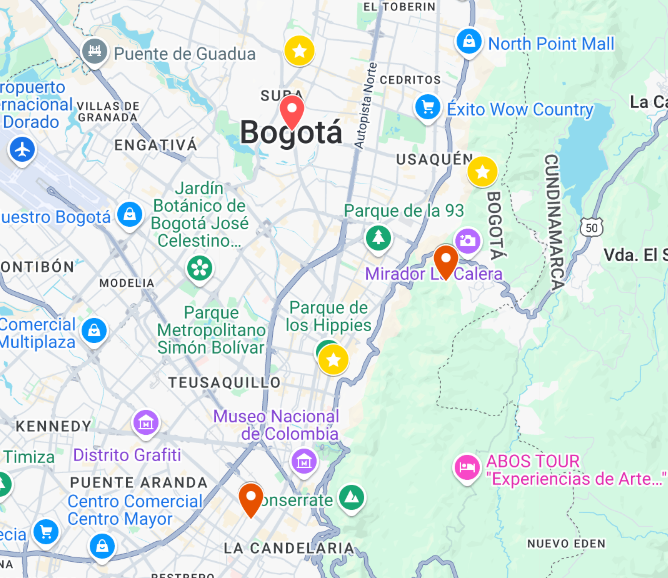

  *Figura 1.* Mapa de Bogotá con la ubicación de los centros de distribución (círculos rojos: CD1, CD2, CD3) y clientes (estrellitas amarillas: C1, C2, C3) según los datos de ejemplo. Las coordenadas (latitud, longitud) provienen del enunciado y fueron utilizadas para el cálculo de distancias. Se aprecia la disposición geográfica: CD1 y C2 están en el norte de la ciudad, CD2 al suroccidente, CD3 y C3 hacia el oriente, y C1 en una posición central. Esta distribución sugiere que, probablemente, cada centro atenderá principalmente a los clientes más cercanos en su zona.

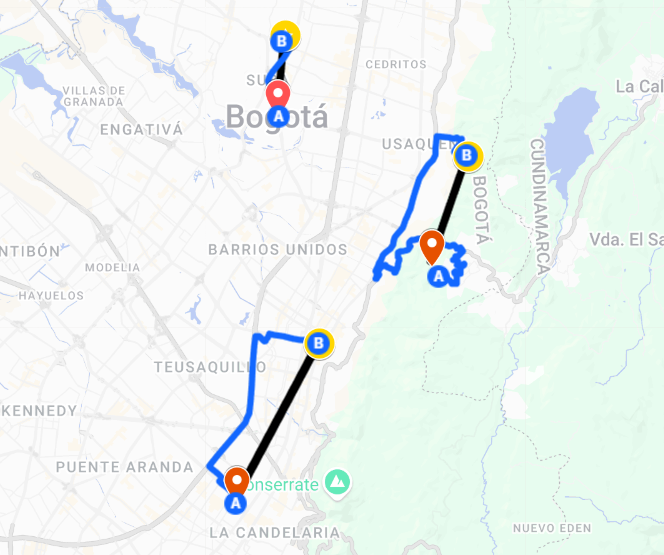

  *Figura 2.* Asignación óptima de rutas para el ejemplo, marcada con líneas negras. Cada línea conecta un centro de distribución con el cliente al que ese centro atiende en la solución óptima en línea recta. En este caso: CD1 entrega a C2, CD2 entrega a C1 y CD3 entrega a C3. Adicionalmente, se muestra en azul el recorrido por la malla vial que sigue un vehículo que saldría del centro de distribución hasta el cliente y que no coincide con la distancia en línea recta. Por ejemplo, el vehículo de CD1 (Bodega Norte) recorre ~2.6 km para entregar a Rodrigo (C2), mientras que si intentara entregar a otro cliente más lejano implicaría un recorrido mayor. De igual forma, CD2 atiende al cliente Catalina (C1) que está más al centro (unos 6.5 km), y CD3 atiende a Luis (C3) con un recorrido corto (~4 km). La suma total de distancia recorrida por la flota en esta solución es ~$2.7 + 6.8 + 14.0 \approx 23.5$ km de ida (el doble si consideramos viaje de ida y vuelta), la cual es considerablemente baja gracias a la estrategia de asignación regional. Por simplicidad, en este primer acercamiento, se asume que el vehículo sigue el mismo trayecto desde A hasta B y desde B hasta A.



El procedimiento para obtener estas distancias consistió en enviar las coordenadas de origen-destino a un servicio de routing. En este caso, se empleó Google Maps API financiada con créditos sobrantes de una materia que utilizaba recursos en GCP, obteniendo respuestas JSON con la distancia en metros para la ruta óptima. Pensando en el futuro, también se podría haber utilizado una librería Python (como `osmnx` con datos de OpenStreetMap) para calcular la longitud del camino más corto entre coordenadas ([ Kashyap, 2023](https://medium.com/@rishabh.teresa/driving-distance-between-coordinates-87ab5268def6#:~:text=Then%20using%20city%20and%20country,using%20OSMnx%20%26%20NetworkX%20packages)). De cualquier forma, el resultado es una matriz de distancias $d_{uv}$ como la mostrada, que alimenta al modelo. Estas distancias por carretera sustituyen a las calculadas por Haversine en las restricciones de autonomía y en el cómputo de costos. Así aseguramos que, por ejemplo, un vehículo con 100 km de rango no sea asignado a una ruta que en realidad requiere 120 km de conducción. 

Además de las distancias, en el preprocesamiento se consolidan todos los parámetros cuantitativos: capacidades de vehículos y centros, demandas, costos por km. Algunos de estos datos fueron suministrados (por ejemplo, costos: \$15k combustible, \$5k flete, \$700 mant. por km ). También se decide en esta etapa la realización de cualquier homogeneización de unidades (convertir kg a unidades, o viceversa, si fuese necesario). El resultado final del preprocesamiento es un conjunto completo de parámetros numéricos listos para ingresar al modelo matemático. 

Este incluye la matriz de distancias de conducción reales, que es posiblemente el aporte más significativo de esta etapa del pipeline, pues convierte la formulación general en un modelo cuantitativo adaptado a la geografía y vialidad de Bogotá.

## 5. Trabajos Futuros en Validación

En esta etapa del proyecto, se ha completado el desarrollo y la validación inicial del modelo de optimización para la distribución urbana de mercancías. Sin embargo, dado que este modelo se encuentra en una fase de prueba y desarrollo, se prevé una validación más exhaustiva una vez que el modelo se implemente en un entorno de producción. Esta validación se centrará en asegurar que el modelo sea capaz de adaptarse a escenarios de mayor escala y en tiempo real, optimizando las rutas de manera eficiente en diversas condiciones operativas.

### consideraciones Futuras para el modelo.

1. **Validación con Escenarios de Mayor Escala**: El modelo desarrollado se ha probado con un conjunto de datos de ejemplo limitado, lo que ha permitido verificar su comportamiento y funcionalidad. No obstante, será necesario expandir las pruebas a instancias más grandes, con una mayor cantidad de centros de distribución, vehículos y clientes. Esto permitirá evaluar cómo se comporta el modelo bajo condiciones más complejas y cómo se gestionan las rutas en redes más grandes, con distancias y demandas más variadas.

2. **Pruebas con Datos en Tiempo Real**: Aunque los datos utilizados para este modelo fueron representativos y consistentes con la realidad de la ciudad de Bogotá, el siguiente paso será integrar datos en tiempo real. Estos datos pueden incluir cambios en la red vial debido a cierres de calles o congestiones inesperadas, lo cual impacta la precisión de las distancias y tiempos estimados. La validación del modelo con datos dinámicos de tráfico o eventos imprevistos permitirá probar la robustez del modelo en situaciones reales de logística urbana.

3. **Análisis de Sensibilidad y Escenarios de Variabilidad**: Un aspecto clave de la validación futura será analizar la sensibilidad del modelo a cambios en los parámetros críticos, como las capacidades de los vehículos, la autonomía, las demandas de los clientes, y los costos operativos. A través de la simulación de escenarios, se podrá observar cómo el modelo responde a incrementos en la demanda, modificaciones en los costos del combustible o cambios en la disponibilidad de vehículos. Estas pruebas permitirán asegurar que el modelo sigue produciendo resultados óptimos bajo diferentes condiciones operativas y de negocio.

4. **Optimización en Tiempo Real**: En un futuro cercano, será necesario implementar mecanismos de optimización en tiempo real para ajustar las rutas conforme a cambios inesperados. Esto implicaría el uso de algoritmos que no solo resuelvan el problema una vez, sino que también puedan hacer ajustes dinámicos durante el transcurso de las operaciones. La integración de esta capacidad será crucial para adaptarse a variaciones en el tráfico, en las ventanas de tiempo de entrega, o en la disponibilidad de recursos.

5. **Validación de Costos Operativos**: Una de las principales restricciones del modelo es la minimización de los costos operativos, que dependen de diversos factores como el combustible, el mantenimiento de los vehículos y los costos de flete. En este sentido, un futuro análisis incluirá la evaluación de cómo estos costos afectan el comportamiento del modelo cuando las condiciones económicas cambian, como aumentos en los precios del combustible o costos de mantenimiento elevados. Además, se buscará evaluar si se puede incorporar un modelo de costos fijos por vehículo o por hora de trabajo para diversificar la optimización de recursos y gastos.

6. **Evaluación de la Eficiencia en Diferentes Condiciones Urbanas**: La ciudad de Bogotá presenta una gran variabilidad en términos de tráfico, condiciones de la red vial y congestión en diferentes momentos del día. Un análisis más profundo en escenarios de congestión extrema, eventos especiales o restricciones temporales en la red vial permitirá verificar la capacidad del modelo para encontrar soluciones eficientes, incluso cuando las condiciones operativas cambian abruptamente.

7. **Implementación de Heurísticas para Escenarios Complejos**: A medida que el modelo crece en complejidad, puede volverse computacionalmente intensivo debido a la naturaleza NP-hard del problema. Una posible mejora futura sería la implementación de heurísticas o métodos aproximados para la resolución del problema de enrutamiento en instancias grandes, lo que permitiría obtener soluciones rápidas, aunque no necesariamente óptimas, en escenarios de alta complejidad.

### Conclusión

Aunque el modelo actual ya ha demostrado ser efectivo para el caso de prueba en Bogotá, es esencial seguir con la validación en situaciones más complejas y dinámicas. El trabajo futuro en estas áreas garantizará que el sistema de optimización sea lo suficientemente robusto y adaptable para implementarse de manera exitosa en operaciones reales y de gran escala, mejorando la eficiencia en la distribución urbana de mercancías y reduciendo los costos operativos.

## Bibliografía

- Kashyap, Rishabh (2023). “Drivable Distance, Time & Job Optimisation.” Medium. Disponible en https://medium.com/@rishabh.teresa/driving-distance-between-coordinates-87ab5268def6

- Safford, S. y Zenk, S. (2013). “A Nationwide Comparison of Driving Distance Versus Straight‑Line Distance to Hospitals.” *International Journal of Health Geographics*. Disponible en https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3835347/

- OpenRouteService (2025). *OpenRouteService API*. Disponible en https://openrouteservice.org

- OpenStreetMap contributors (2025). *OpenStreetMap Data*. Disponible en https://www.openstreetmap.org

- Miller, C.; Tucker, A.; Zemlin, R. (1960). “Integer programming formulation of the traveling salesman problem.” *Journal of the ACM*, 7(4), 326–329.


## Anexo A. Otra Aproximación del Desarrollo de la Función Objetivo

En esta sección, se presenta una aproximación inicial para la formulación de la función objetivo del modelo, la cual refleja el criterio a optimizar en el contexto de la distribución urbana de mercancías. Como se mencionó previamente, el objetivo principal de LogistiCo es minimizar los costos totales de operación del transporte urbano, especialmente los costos variables que dependen de la distancia recorrida. Esta aproximación fue desarrollada en una fase temprana del proyecto para explorar posibles soluciones antes de llegar a la formulación final que se implementó.



### A.1 Minimización de la distancia
La función objetivo inicial se basaba en la minimización de los costos totales asociados con las rutas, incluyendo el gasto en combustible, mantenimiento de los vehículos y el costo por flete, todos los cuales dependen directamente de la distancia recorrida. De acuerdo con esta aproximación, se combinaban estos costos en una sola variable, $c_{uv}$, la cual representaba el costo total por kilómetro entre dos puntos $u$ y $v$ en la red vial.

La función objetivo se formuló de la siguiente manera:

$$
\min Z_1 = \sum_{k \in K} \sum_{u \in N} \sum_{v \in N} c_{uv} \cdot x_{uvk}
$$

Donde $c_{uv}$ se desglosaba en tres componentes lineales por kilómetro:

$$
c_{uv} = C_{\text{comb}} \cdot d_{uv} + C_{\text{mant}} \cdot d_{uv} + C_{\text{flete}} \cdot d_{uv}
$$

Usando los valores de ejemplo proporcionados ($C_{\text{comb}} = 15,000$ COP/km, $C_{\text{flete}} = 5,000$ COP/km, $C_{\text{mant}} = 700$ COP/km), se obtenía un costo total de $c_{uv} = 20,700$ COP/km. Esta aproximación de la función objetivo buscaba minimizar la suma de $c_{uv} x_{uvk}$, lo que equivalía a minimizar la distancia recorrida por la flota de vehículos.

Además de esta minimización de distancia, también se planteó una segunda función objetivo que consideraba el tiempo asociado a cada recorrido:

$$
\min Z_2 = \sum_{k \in K} \sum_{u \in N} \sum_{v \in N} t_{uv} \cdot x_{uvk}
$$

Aquí, $t_{uv}$ representaba el tiempo necesario para recorrer la distancia entre los puntos $u$ y $v$. Al igual que en el caso de los costos, esta función objetivo buscaba minimizar el tiempo total de operación de la flota.

Finalmente, para combinar ambos objetivos (minimización de distancia y tiempo), se utilizó una técnica de promedios ponderados:

$$
\min Z = \lambda Z_1 + (1-\lambda) Z_2
$$

Donde $\lambda \in (0,1)$ representaba el parámetro de ponderación entre las dos subfunciones. El objetivo era encontrar un equilibrio entre el costo de los kilómetros recorridos y el tiempo necesario para realizar las entregas.



### A.2 Refinamiento y Consideraciones Adicionales
Aunque esta aproximación inicial fue útil para entender los componentes del problema, no fue la solución final que se adoptó. Durante el proceso de desarrollo, se identificaron algunos aspectos que requerían un ajuste en la formulación de la función objetivo:

- **Minimización de tiempo de entrega:** Aunque la minimización de la distancia es generalmente un buen proxy para minimizar el tiempo, en un entorno urbano como el de Bogotá, factores como el tráfico o las condiciones de la red vial pueden influir significativamente en el tiempo total de entrega. Sin embargo, en esta fase inicial, se asumió que el costo y el tiempo estaban alineados, por lo que optimizar únicamente la distancia fue considerado adecuado.

- **Equidad o balance de carga:** Otra posible mejora futura podría ser incorporar un término en la función objetivo para balancear la carga entre los vehículos, asegurando que no haya vehículos sobrecargados mientras otros quedan sin utilizar. Sin embargo, esta consideración no fue prioritaria en este enfoque inicial.

Esta formulación inicial de la función objetivo se centró en minimizar los costos asociados a la distancia recorrida, lo cual cumplía con el objetivo estratégico de LogistiCo de reducir los costos operativos. Sin embargo, en la versión final del modelo, se optó por una aproximación diferente, que se desarrolló en base a una serie de consideraciones prácticas y operativas más detalladas. Aunque esta versión no se implementó al final, sirvió como un valioso punto de partida para estructurar la solución y entender los elementos clave del problema.